In [6]:
%run ../methods/original-sudoku-module.py
%run plot-settings.py

In [ ]:
import numpy as np
import pandas as pd
import time
import pickle

# Global variables
N = 3
constraints = get_constraints(N)
weightMatrix = get_weight_matrix(N)

def compute_results(file_name, M, factor):
    results = []
    for _ in range(M):
        sudoku = read_sudoku(file_name)
        sudoku = initialize_sudoku(sudoku, constraints)
        sudoku = solve_sudoku(sudoku,factor,constraints,weightMatrix)
        results.append(sudoku)
    # Save results to a file
    with open('../data/resultaten/results-{:0>3.0f}.pkl'.format(1000*factor), "wb") as f:
        pickle.dump(results, f)  # Using pickle to serialize the results

if __name__ == "__main__":
    start_time = time.time()

    file_names = ["../data/tazuku-01.txt"]
    M = 1
    interval = list(range(800,901))
    interval =[500]
    
    for i in interval:
        factor = i / 1000
        compute_results(file_names[0], M, factor)

    print(f"Execution time: {time.time() - start_time} seconds")


In [2]:
import pickle
interval = list(range(999,1000))
interval = [800,900,990,999]
interval = [990,999]
interval = [72,999]
results = []

for i in interval:
    solutions = pickle.load(open('../data/resultaten/results-{:0>3.0f}.pkl'.format(i), 'rb'))
    M = len(solutions)
    solution = solutions[0]
    result_array=np.array(solution['result'])
    E = result_array[:,0]
    S = result_array[:,1]
    J = result_array[:,-2]
    t = result_array[:,2]
    results.append([t,E,S,J])    
    score = 0
    for j in range(M):
        score += 1 if solutions[j]['energy']==0 else 0

    print(i, score/M)

72 1.0
999 1.0


In [ ]:
# import matplotlib.pyplot as plt

# # COLORS
# black = np.array([0,0,0])/256
# orange = np.array([230,159,0])/256
# skyblue = np.array([86,180,233])/256
# bluishgreen = np.array([0,158,115])/256
# yellow = np.array([240,228,66])/256
# blue = np.array([0,114,178])/256
# vermillion= np.array([213,94,0])/256
# reddishpurple= np.array([204,121,167])/256

# # SETTINGS

# SMALL_SIZE = 10
# MEDIUM_SIZE = 12
# BIGGER_SIZE = 14

# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# import matplotlib.pyplot as plt
import pandas as pd

t0, E0, S0, J0 =results[0]

X = pd.DataFrame(np.transpose(np.asarray([t0,E0])),columns=['temperature','Energy'])
Y = X.groupby('temperature').mean()
Z = Y.diff()
idx = Z.idxmax()['Energy']
U = pd.DataFrame(np.transpose(np.asarray([t0,S0,E0])),columns=['T','Entropy','Energy'])
U['t'] = U.diff()['Energy']/U.diff()['Entropy']
U0 = U[1:]

t1, E1, S1, J1 =results[1]

X = pd.DataFrame(np.transpose(np.asarray([t1,E1])),columns=['temperature','Energy'])
Y = X.groupby('temperature').mean()
Z = Y.diff()
idx = Z.idxmax()['Energy']
U = pd.DataFrame(np.transpose(np.asarray([t1,S1,E1])),columns=['T','Entropy','Energy'])
U['t'] = U.diff()['Energy']/U.diff()['Entropy']
U1 = U[1:]

In [4]:
import pickle
aggregatedresults = pickle.load(open('aggregratedresults.pkl'.format(i), 'rb'))
agg_results = np.array(aggregatedresults)

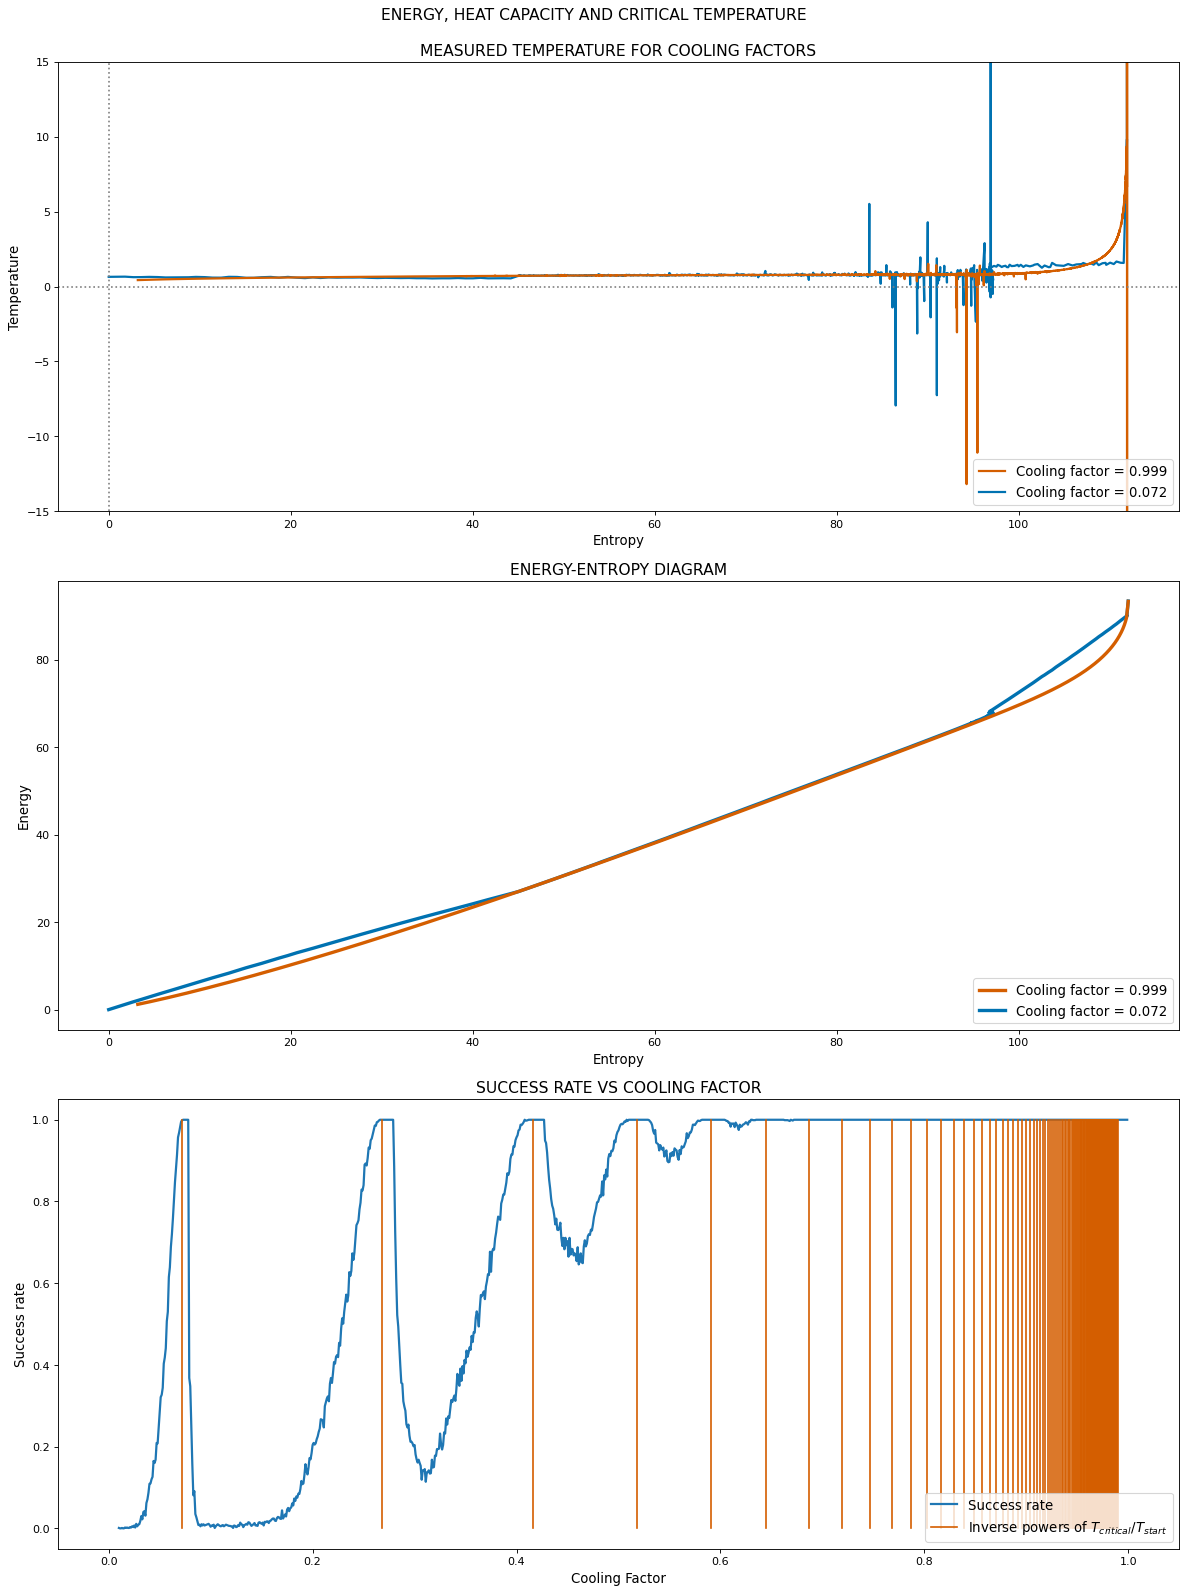

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False,figsize=(15, 20), dpi=80)

ax = ax1
line0,=ax.plot(U0['Entropy'],U0['t'],lw=2,label='Cooling factor = 0.072',color=blue)
line1,=ax.plot(U1['Entropy'],U1['t'],lw=2,label='Cooling factor = 0.999',color=vermillion)
# line2,=ax.plot(U1['Entropy'],U1['T'],lw=3, label='Steered temperature',color=vermillion)
ax.set_ylim([-15,15])
ax.axvline(x=0, color="gray", linestyle="dotted")    
ax.axhline(y=0, color="gray", linestyle="dotted")

ax.set_title('MEASURED TEMPERATURE FOR COOLING FACTORS')
ax.set_xlabel('Entropy')
ax.set_ylabel('Temperature')
ax.legend(handles=[line1,line0],loc='lower right')

ax = ax2
line0,=ax.plot(S0,E0,lw=3,label='Cooling factor = 0.072',color=blue)
line1,=ax.plot(S1,E1,lw=3,label='Cooling factor = 0.999',color=vermillion)
# line2,=ax.plot(U0['Entropy'],U0['T'],lw=2, label='Steered temperature')
# ax.set_ylim([-15,15])
# ax.axvline(x=0, color="gray", linestyle="dotted")    
# ax.axhline(y=0, color="gray", linestyle="dotted")

ax.set_title('ENERGY-ENTROPY DIAGRAM')
ax.set_xlabel('Entropy')
ax.set_ylabel('Energy')
ax.legend(handles=[line1,line0],loc='lower right')

ax = ax3
h1, = ax.plot(agg_results[:,0]/1000,agg_results[:,1]/1000,lw=2,label='Success rate')
ct = 0.072
h2 = ax.plot([ct,ct],[0,1],color=vermillion,label='Inverse powers of $T_{critical}/T_{start}$')
for i in range(2,250):
    ax.plot([ct**(1/i),ct**(1/i)],[0,1],color=vermillion)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])

ax.set_title('SUCCESS RATE VS COOLING FACTOR')
ax.set_xlabel('Cooling Factor')
ax.set_ylabel('Success rate')
ax.legend(loc='lower right')

fig.suptitle('ENERGY, HEAT CAPACITY AND CRITICAL TEMPERATURE',y=0.995)
fig.tight_layout() 

plt.savefig('critical-temperature.png',transparent=True)